Imports and Helper Code

In [3]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram, plot_bloch_multivector
import numpy as np
import math

# Only when you are using Jupyter notebooks in dark mode
from matplotlib import style
style.use('dark_background')
style.use('bmh')

In [4]:
sim = Aer.get_backend('statevector_simulator')

In [5]:
random_gate = QuantumCircuit(1)
random_gate.rx(np.pi/4, 0)
random_gate.ry(np.pi/6, 0)
random_gate.rz(np.pi/2.5, 0)
random_gate = random_gate.to_gate()
random_gate.name = 'psi'

## Step 1: Generate a qubit to be shared between Alica and Bob. 
(Alice doesn't know the actual state fucntion of this qubit)

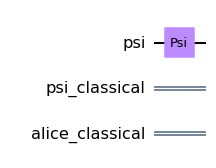

In [7]:
circuit = QuantumCircuit()

psi_classical = ClassicalRegister(1, name = 'psi_classical')
alice_classical = ClassicalRegister(1, name = 'alice_classical')
psi = QuantumRegister(1, name = 'psi')

circuit.add_register(psi_classical)
circuit.add_register(alice_classical)
circuit.add_register(psi)

circuit.append(random_gate, psi)
circuit.draw('mpl')

## Step 2: Generate an EPR pair (Bell state) $\beta_{00}$
We use a hadamard gate and the CNOT gate to produce the EPR pair

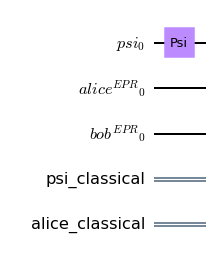

In [8]:
Bob_EPR = QuantumRegister(1, name = 'bob^{EPR}')
Alice_EPR = QuantumRegister(1, name = 'alice^{EPR}')
circuit.add_register(Alice_EPR)
circuit.add_register(Bob_EPR)
circuit.draw('mpl')

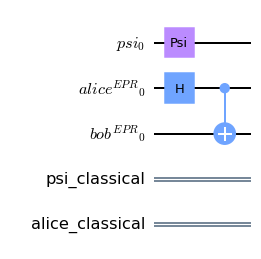

In [9]:
circuit.h(Alice_EPR)
circuit.cx(Alice_EPR, Bob_EPR)
circuit.draw('mpl')

## Step 3: Converting bell states in Alice's qubits to Computational basis

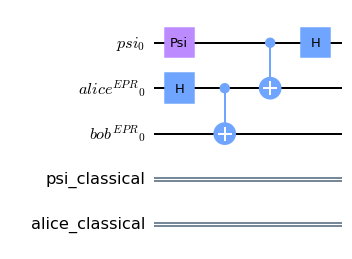

In [10]:
circuit.cx(psi, Alice_EPR)
circuit.h(psi)
circuit.draw('mpl')

## Step 4: Measure both of Alice's qubits, and apply gates in Bob's qubit

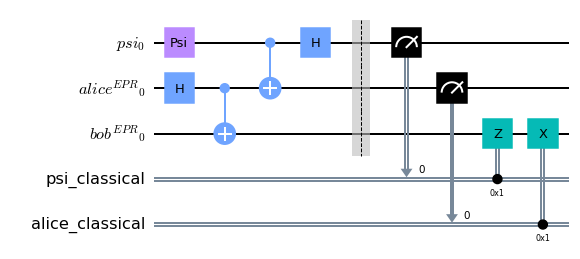

In [11]:
circuit.barrier()
circuit.measure(psi, 0)
circuit.measure(Alice_EPR, 1)

circuit.z(Bob_EPR).c_if(psi_classical, 1)
circuit.x(Bob_EPR).c_if(alice_classical, 1)
circuit.draw('mpl')

## Step 5: Get Bob's qubit's final state

0j|000> + (0.78-0.444j)|001> + 0j|010> + (-0+0j)|011> + (-0+0j)|100> + (0.411-0.158j)|101> + (-0+0j)|110> + (-0+0j)|111> 

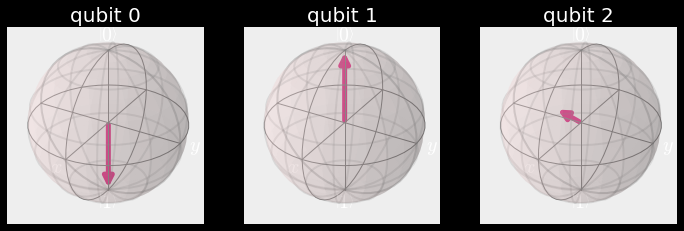

In [19]:
result = execute(circuit, sim, shots = 1).result().get_statevector()
dirac_notation(result, 3, 3)
# print(result)
plot_bloch_multivector(result)

## Step 6: Verifying results

statevactor: (0.78-0.444j)|0> + (0.411-0.158j)|1> 

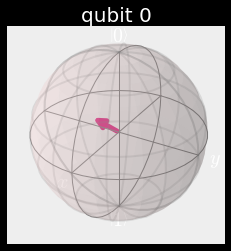

In [17]:
qc = QuantumCircuit(1)
qc.append(random_gate, [0])
result = execute(qc, sim, shots = 1).result().get_statevector()
print('statevactor', end = ': ')
dirac_notation(result, 1, 3)
plot_bloch_multivector(result)